In [4]:
import os
from glob import glob
import random
from tqdm.notebook import tqdm
import numpy as np
import pickle

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [15]:
from embedding_model import EmbeddingModel

## Define initial variables

In [16]:
IMGS_FOLDER = 'flickr_images/15K Nocturna Valencia Banco Mediolanum/'
EMBEDDINGS_PATH = 'flickr_images/15K_Nocturna_Valencia_Banco_Mediolanum_nobg_embeddings.pkl'

## Read images

In [8]:
# Read images from disk

imgs_list = glob(IMGS_FOLDER + '*')
imgs_list = [el.replace('\\','/') for el in imgs_list]
imgs_list = [el for el in imgs_list if el.split('.')[-1] in ['jpg','jpeg','png']]

for img_path in tqdm(imgs_list.copy()):
    try:
        img = Image.open(img_path)
    except:
        imgs_list.remove(img_path)
        
print(f'Number of images: {len(imgs_list)}')

  0%|          | 0/909 [00:00<?, ?it/s]

Number of images: 909


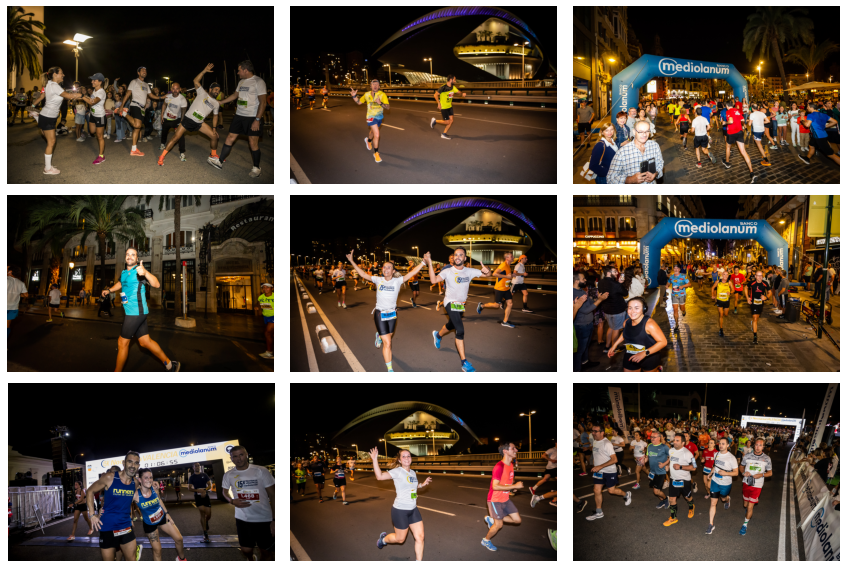

In [9]:
# Display a grid of random images

fig, axes = plt.subplots(3,3, figsize=(12,8))
for i, img in enumerate(random.sample(imgs_list, 9)):
    axes[i//3, i%3].imshow(Image.open(img))
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

## Load model

In [17]:
embed_model = EmbeddingModel()

cpu


## Get image embeddings

In [13]:
# generate embedding for images in batches
batch_size = 50
img_embeddings_np = None

for i in tqdm(range(0, len(imgs_list), batch_size), unit='batch'):
    batch_img_paths = imgs_list[i:i+batch_size]
    
    try:
        batch_embeddings = embed_model.encode_images(batch_img_paths, normalize=False)
    except Exception as e:
        print('Error in batch {}. {}'.format(i, e))
        continue
    
    if img_embeddings_np is None:
        img_embeddings_np = batch_embeddings.copy()
    else:
        img_embeddings_np = np.concatenate((img_embeddings_np, batch_embeddings), axis=0)

# Normalize image embeddings
img_embeddings_np /= np.linalg.norm(img_embeddings_np, ord=2, axis=-1, keepdims=True)

print(img_embeddings_np.shape)

  0%|          | 0/19 [00:00<?, ?batch/s]

(909, 512)


In [14]:
# Save image embeddings in disk. Each item of the dict will contain 
# the name of the image as a key, and the numpy array of the embedding as a value

embed_dict = {img_path.rsplit('/',1)[-1]: embedding_np for img_path, embedding_np in zip(imgs_list, img_embeddings_np)}

for k,v in embed_dict.items():
    print(k, v.shape)
    break

with open(EMBEDDINGS_PATH, 'wb') as handle:
    pickle.dump(embed_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

1-2219-15KNocturna-2022-105_52404455044.jpg (512,)
